In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
from ipywidgets import interactive
from ipywidgets import FloatSlider

Tento sešit se zabýví řešením soustavy dvou homogenních lineárních diferenciálních rovnic s konstantními koeficienty. Řešíme tedy soustavu
$$\eqalign{
\dot x(t)&=ax(t)+by(t)\cr
\dot y(t)&=cx(t)+dy(t)
}$$

Vektorově se tato soustava dá zapsat ve tvaru
$$\pmatrix{\dot x(t)\cr\dot y(t)}=\pmatrix{a&b\cr c&d}\pmatrix{x(t)\cr y(t)}$$
nebo kompaktně $\dot{\vec x}(t)=A\vec x(t)$, kde $A=\pmatrix{a&b\cr c&d}$.

K této soustavě doplníme dvojici počátečních podmínek
$$\eqalign{
x(0)&=x_0\cr
y(0)&=y_0}$$

Řešení soustavy se potom dá zapsat ve tvaru $\vec x(t)=\exp(At)\vec x_0$, kde $\exp$ je tzv. *maticová exponenciála* a $\vec x_0$ vektor počátečních podmínek.

In [2]:
A=np.array([  #matice soustavy
    [ 1, 1],
    [-2, 3]
])

x0=0          #počáteční podmínka
y0=0.01

Následující kód vizualizuje řešení zadané soustavy. Dělá dvě věci:

Za prvé vykresluje vektorové pole dané soustavou. V každém bodě $\pmatrix{x\cr y}$ vykreslíme šipku mířící směrem $\pmatrix{u\cr v}=A\pmatrix{x\cr y}$. Jedná se o malinko něco jiného než jsme dělali pro jednu rovnici na začátku semestru. Tam jsme měli na vodorovné ose „čas“ (nezávisle proměnnou) a na svislé ose neznámou funkci. Teď v tomto případě máme na vodorovné a na svislé ose ony dvě neznámé funkce $x(t)$ a $y(t)$ a čas se v grafu vůbec nevyskytuje. Nevadí to, protože soustava je autonomní, takže vektorové pole vypadá v každém čase stejně (srov. se situací pro jednu rovnici). V případě s jednou rovnicí jsme měli všechny šipky stejně dlouhé a jejich směr nám ukazoval, jak moc řešení roste. Teď když v grafu nemáme čas, tak rychlost růstu (rychlost pohybu) nemůžeme značit vhodným směrem, místo toho máme různě dlouhé šipky. (Čím delší šipka, tím rychleji se bod pohybuje v čase.) Směr šipky pak určuje směr pohybu.

Za druhé vyřešíme soustavu se zadanou počáteční podmínkou. V grafu je modře zvýrazněn bod o souřadnicích $\pmatrix{x_0\cr y_0}$, tj. daný počáteční podmínkou v čase $t=0$. Pohybem slideru pod obrázkem můžete zvětšit čas $t$ a podívat se, kam se bod posouvá. Měl by se vždy posouvat ve směru šipek.

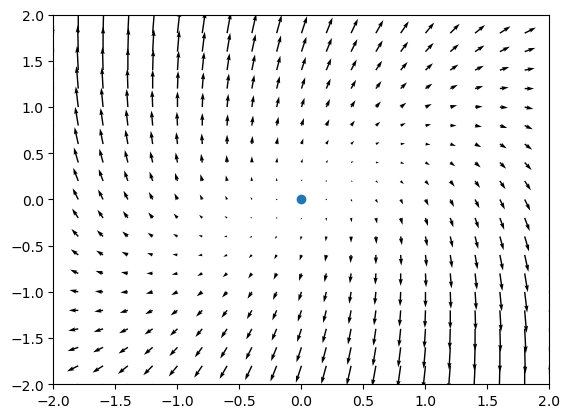

interactive(children=(FloatSlider(value=0.0, description='t', max=3.0, step=0.01), Output()), _dom_classes=('w…

In [3]:
%matplotlib inline
x,y = np.meshgrid(np.linspace(-2,2,21),np.linspace(-2,2,21))
u=A[0,0]*x+A[0,1]*y
v=A[1,0]*x+A[1,1]*y

def ptdo(t):
    plt.figure(1)
    plt.quiver(x,y,u,v)
    [x1,y1]=np.matmul(expm(A*t),[x0,y0])
    pt,=plt.plot(x1,y1,marker="o")
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.show()


interactive_plot = interactive(ptdo, t=FloatSlider(min=0, max=3, step=0.01, value=0))
interactive_plot

Tip na hraní: Zadejte jako $A$ nějakou matici s reálnými vlastními čísly. (Třeba první příklad ze cvičení.) Teď když jako počáteční podmínku zadáte vlastní vektor příslušný nějakému vlastnímu číslu $\lambda$, tak by při časovém vývoji bod měl zůstat v daném vlastním podprostoru; pohybuje se tedy po přímce. Je-li $\lambda<0$, pak se přibližuje ke středu, naopak pro $\lambda>0$ diverguje pryč.

Zkuste jako počáteční podmínku rovněž něco velmi blízkého počátku a ověřte, že funguje kriterium stability stacionárního řešení.